In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import LabelEncoder


In [2]:
df = pd.read_csv(r'C:\Users\User\Desktop\303\archive\taxi_trip_pricing.csv')


In [3]:
print(df.info())
print(df.describe())


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 11 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   Trip_Distance_km       950 non-null    float64
 1   Time_of_Day            950 non-null    object 
 2   Day_of_Week            950 non-null    object 
 3   Passenger_Count        950 non-null    float64
 4   Traffic_Conditions     950 non-null    object 
 5   Weather                950 non-null    object 
 6   Base_Fare              950 non-null    float64
 7   Per_Km_Rate            950 non-null    float64
 8   Per_Minute_Rate        950 non-null    float64
 9   Trip_Duration_Minutes  950 non-null    float64
 10  Trip_Price             951 non-null    float64
dtypes: float64(7), object(4)
memory usage: 86.1+ KB
None
       Trip_Distance_km  Passenger_Count   Base_Fare  Per_Km_Rate  \
count        950.000000       950.000000  950.000000   950.000000   
mean          27.07054

In [4]:
df['Base_Fare'].fillna(df['Base_Fare'].mean(), inplace=True)


C:\Users\User\AppData\Local\Temp\ipykernel_7548\2822430381.py:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['Base_Fare'].fillna(df['Base_Fare'].mean(), inplace=True)


##handling missing value

In [5]:
df['Base_Fare'] = df['Base_Fare'].fillna(df['Base_Fare'].mean())


In [6]:
df.head()

,Trip_Distance_km,Time_of_Day,Day_of_Week,Passenger_Count,Traffic_Conditions,Weather,Base_Fare,Per_Km_Rate,Per_Minute_Rate,Trip_Duration_Minutes,Trip_Price
0,19.35,Morning,Weekday,3.0,Low,Clear,3.560000,0.80,0.32,53.82,36.2624
1,47.59,Afternoon,Weekday,1.0,High,Clear,3.502989,0.62,0.43,40.57,NaN
2,36.87,Evening,Weekend,1.0,High,Clear,2.700000,1.21,0.15,37.27,52.9032
3,30.33,Evening,Weekday,4.0,Low,NaN,3.480000,0.51,0.15,116.81,36.4698
4,NaN,Evening,Weekday,3.0,High,Clear,2.930000,0.63,0.32,22.64,15.6180


In [7]:
df.isnull().sum()

Trip_Distance_km         50
Time_of_Day              50
Day_of_Week              50
Passenger_Count          50
Traffic_Conditions       50
Weather                  50
Base_Fare                 0
Per_Km_Rate              50
Per_Minute_Rate          50
Trip_Duration_Minutes    50
Trip_Price               49
dtype: int64

In [8]:
df.describe()

,Trip_Distance_km,Passenger_Count,Base_Fare,Per_Km_Rate,Per_Minute_Rate,Trip_Duration_Minutes,Trip_Price
count,950.000000,950.000000,1000.000000,950.000000,950.000000,950.000000,951.000000
mean,27.070547,2.476842,3.502989,1.233316,0.292916,62.118116,56.874773
std,19.905300,1.102249,0.848107,0.429816,0.115592,32.154406,40.469791
min,1.230000,1.000000,2.010000,0.500000,0.100000,5.010000,6.126900
25%,12.632500,1.250000,2.770000,0.860000,0.190000,35.882500,33.742650
50%,25.830000,2.000000,3.502989,1.220000,0.290000,61.860000,50.074500
75%,38.405000,3.000000,4.202500,1.610000,0.390000,89.055000,69.099350
max,146.067047,4.000000,5.000000,2.000000,0.500000,119.840000,332.043689


In [ ]:
df['Base_Fare'].value_counts()

0      3.560000
1      3.502989
2      2.700000
3      3.480000
4      2.930000
         ...   
995    2.390000
996    3.120000
997    2.080000
998    2.670000
999    4.340000
Name: Base_Fare, Length: 1000, dtype: float64

In [42]:
# For continuous columns like "fare_amount"
mean_fare = df['Base_Fare'].mean()
median_fare = df['Base_Fare'].median()
variance_fare = df['Base_Fare'].var()
std_dev_fare = df['Base_Fare'].std()

print(mean_fare, median_fare, variance_fare, std_dev_fare)


3.502989473684211 3.502989473684211 0.7192847946894263 0.8481065939428996


# Check for missing values in dataset

In [43]:


df.isnull().sum()


Trip_Distance_km         50
Time_of_Day               0
Day_of_Week              50
Passenger_Count          50
Traffic_Conditions       50
Base_Fare                 0
Per_Km_Rate              50
Per_Minute_Rate          50
Trip_Duration_Minutes    50
Trip_Price               49
Weather_Rain              0
Weather_Snow              0
dtype: int64

In [10]:
df.dtypes

Trip_Distance_km         float64
Time_of_Day               object
Day_of_Week               object
Passenger_Count          float64
Traffic_Conditions        object
Weather                   object
Base_Fare                float64
Per_Km_Rate              float64
Per_Minute_Rate          float64
Trip_Duration_Minutes    float64
Trip_Price               float64
dtype: object

In [11]:
le = LabelEncoder()
df['Time_of_Day'] = le.fit_transform(df['Time_of_Day'])


In [12]:
df['Time_of_Day']

0      2
1      0
2      1
3      1
4      1
      ..
995    0
996    3
997    2
998    2
999    2
Name: Time_of_Day, Length: 1000, dtype: int32

In [13]:
df.head


<bound method NDFrame.head of      Trip_Distance_km  Time_of_Day Day_of_Week  Passenger_Count  \
0               19.35            2     Weekday              3.0   
1               47.59            0     Weekday              1.0   
2               36.87            1     Weekend              1.0   
3               30.33            1     Weekday              4.0   
4                 NaN            1     Weekday              3.0   
..                ...          ...         ...              ...   
995              5.49            0     Weekend              4.0   
996             45.95            3     Weekday              4.0   
997              7.70            2     Weekday              3.0   
998             47.56            2     Weekday              1.0   
999             22.85            2     Weekend              3.0   

    Traffic_Conditions Weather  Base_Fare  Per_Km_Rate  Per_Minute_Rate  \
0                  Low   Clear   3.560000         0.80             0.32   
1              

In [14]:
df = pd.get_dummies(df, columns=['Weather'], drop_first=True)


In [ ]:
print(df.columns.tolist())


['Trip_Distance_km', 'Time_of_Day', 'Day_of_Week', 'Passenger_Count', 'Traffic_Conditions', 'Base_Fare', 'Per_Km_Rate', 'Per_Minute_Rate', 'Trip_Duration_Minutes', 'Trip_Price', 'Weather_Rain', 'Weather_Snow']


In [ ]:
df.head()

,Trip_Distance_km,Time_of_Day,Day_of_Week,Passenger_Count,Traffic_Conditions,Base_Fare,Per_Km_Rate,Per_Minute_Rate,Trip_Duration_Minutes,Trip_Price,Weather_Rain,Weather_Snow
0,19.35,2,Weekday,3.0,Low,3.560000,0.80,0.32,53.82,36.2624,False,False
1,47.59,0,Weekday,1.0,High,3.502989,0.62,0.43,40.57,NaN,False,False
2,36.87,1,Weekend,1.0,High,2.700000,1.21,0.15,37.27,52.9032,False,False
3,30.33,1,Weekday,4.0,Low,3.480000,0.51,0.15,116.81,36.4698,False,False
4,NaN,1,Weekday,3.0,High,2.930000,0.63,0.32,22.64,15.6180,False,False


# Data Visualization


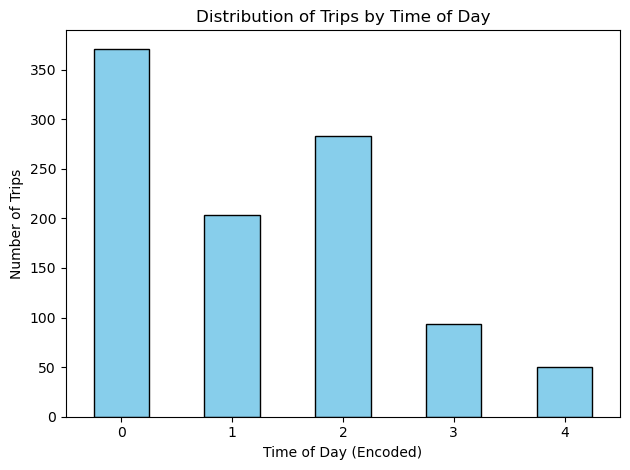

In [27]:
df['Time_of_Day'].value_counts().sort_index().plot(kind='bar', color='skyblue', edgecolor='black')
plt.title('Distribution of Trips by Time of Day')
plt.xlabel('Time of Day (Encoded)')
plt.ylabel('Number of Trips')
plt.xticks(rotation=0)
plt.tight_layout()
plt.show()


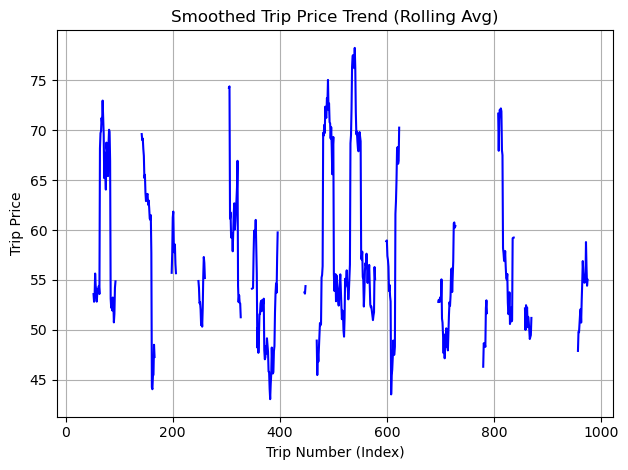

In [30]:
df['Trip_Price'].rolling(window=20).mean().plot(kind='line', color='blue')
plt.title('Smoothed Trip Price Trend (Rolling Avg)')
plt.xlabel('Trip Number (Index)')
plt.ylabel('Trip Price')
plt.grid(True)
plt.tight_layout()
plt.show()

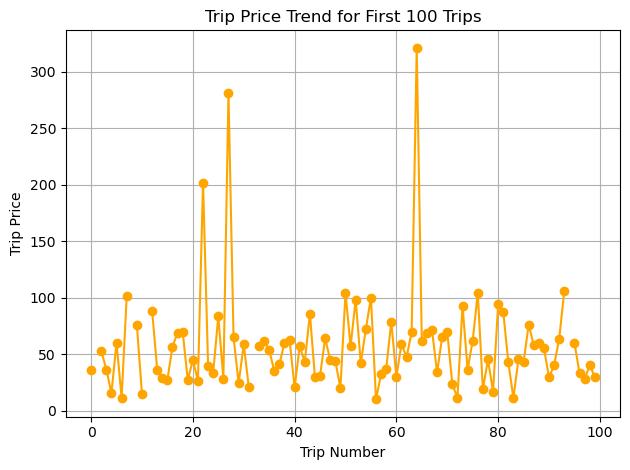

In [41]:
df['Trip_Price'][:100].plot(kind='line', color='orange', marker='o')
plt.title('Trip Price Trend for First 100 Trips')
plt.xlabel('Trip Number')
plt.ylabel('Trip Price')
plt.grid(True)
plt.tight_layout()
plt.show()


outliers


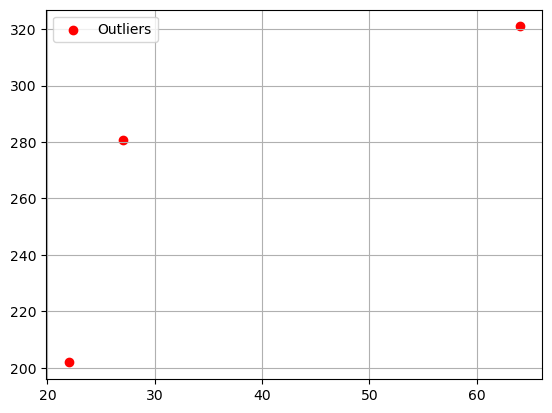

In [34]:
plt.grid(True)


outliers = df['Trip_Price'][:100][df['Trip_Price'][:100] > 200]
plt.scatter(outliers.index, outliers.values, color='red', label='Outliers')
plt.legend()


correlation heatmap


In [22]:
print(df.dtypes)


Trip_Distance_km         float64
Time_of_Day                int32
Day_of_Week               object
Passenger_Count          float64
Traffic_Conditions        object
Base_Fare                float64
Per_Km_Rate              float64
Per_Minute_Rate          float64
Trip_Duration_Minutes    float64
Trip_Price               float64
Weather_Rain                bool
Weather_Snow                bool
dtype: object


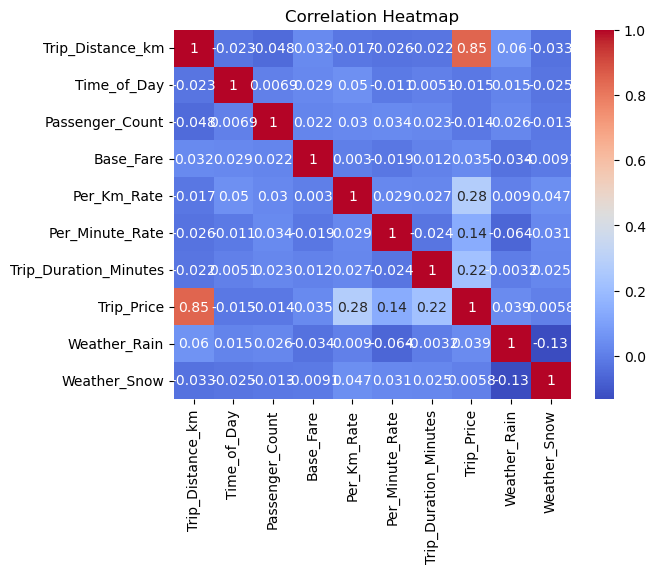

In [23]:
numeric_df = df.select_dtypes(include=['number', 'bool'])
corr = numeric_df.corr()
sns.heatmap(corr, annot=True, cmap='coolwarm')
plt.title('Correlation Heatmap')
plt.show()

In [24]:
df.to_csv('cleaned_taxi_fare_data.csv', index=False)


Check for Skewness in Numeric Columns:

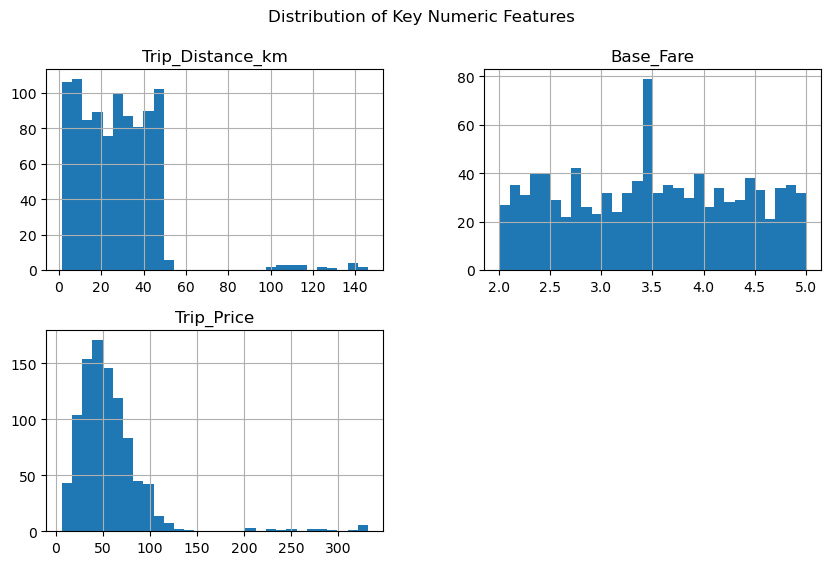

In [40]:
df[['Trip_Distance_km', 'Base_Fare', 'Trip_Price']].hist(bins=30, figsize=(10,6))
plt.suptitle('Distribution of Key Numeric Features')
plt.show()

Pair Plot for Relationships

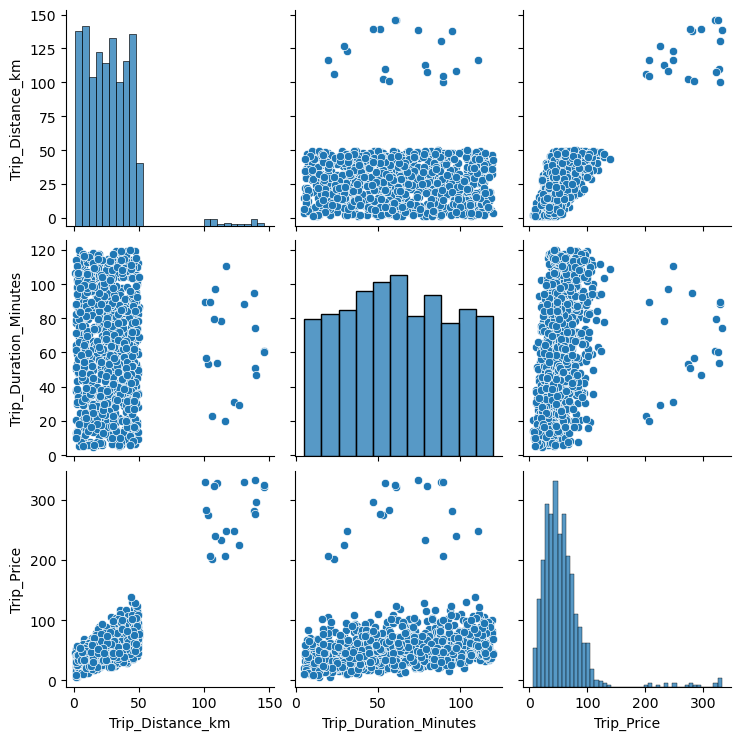

In [39]:

sns.pairplot(df[['Trip_Distance_km', 'Trip_Duration_Minutes', 'Trip_Price']])
plt.show()